In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/application_train.csv


In [2]:
#Importing Libraries

#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import gc
from sklearn import metrics
import lightgbm as lgb
#import xgboost as xgb
import time
import datetime
#from numba import jit

### Reading Data from CSV files

In [3]:
data_train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')


In [4]:
data_test = pd.read_csv('../input/home-credit-default-risk/application_test.csv')

In [5]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [8]:
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


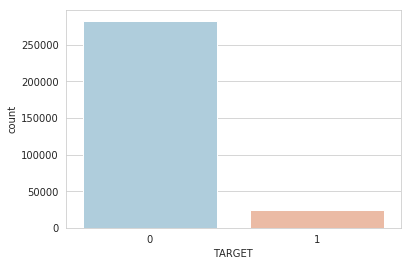

In [9]:
# Good Practice: Always check if data set is balance or imbalance.
sns.set_style('whitegrid')
sns.countplot(x='TARGET',data=data_train,palette='RdBu_r')

In [10]:
statistics_of_data = []
for col in data_train.columns:
  statistics_of_data.append((col,
                             data_train[col].nunique(),
                             data_train[col].isnull().sum()*100/data_train.shape[0],
                             data_train[col].value_counts(normalize=True, dropna=False).values[0] * 100, 
                             data_train[col].dtype
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Feature', 'Uniq_val', 'missing_val', 'val_biggest_cat', 'type'])

In [11]:
stats_df.sort_values('missing_val', ascending=False)

,Feature,Uniq_val,missing_val,val_biggest_cat,type
76,COMMONAREA_MEDI,3202,69.872297,69.872297,float64
48,COMMONAREA_AVG,3181,69.872297,69.872297,float64
62,COMMONAREA_MODE,3128,69.872297,69.872297,float64
70,NONLIVINGAPARTMENTS_MODE,167,69.432963,69.432963,float64
56,NONLIVINGAPARTMENTS_AVG,386,69.432963,69.432963,float64
...,...,...,...,...,...
15,NAME_HOUSING_TYPE,6,0.000000,88.734387,object
14,NAME_FAMILY_STATUS,6,0.000000,63.878040,object
13,NAME_EDUCATION_TYPE,5,0.000000,71.018923,object
12,NAME_INCOME_TYPE,8,0.000000,51.631974,object


### Some Important Observations are:

1. Missing Values are starts with 69.8 %.
2. Columns with biggest value counts are having 2 unique features.

Now we need to do Exploratory data analysis to find out which feature is more important for TARGET variable.

In [12]:
def exploreFeatures(col):
  top_n=10
  top_n = top_n if data_train[col].nunique() > top_n else data_train[col].nunique()
  print(f"{col} has {data_train[col].nunique()} unique values and type: {data_train[col].dtype}.")
  print(data_train[col].value_counts(normalize=True, dropna=False).head())

In [13]:
exploreFeatures('REG_REGION_NOT_WORK_REGION')

REG_REGION_NOT_WORK_REGION has 2 unique values and type: int64.
0    0.949231
1    0.050769
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


In [14]:
exploreFeatures('FLAG_MOBIL')

FLAG_MOBIL has 2 unique values and type: int64.
1    0.999997
0    0.000003
Name: FLAG_MOBIL, dtype: float64


In [15]:
exploreFeatures('FLAG_DOCUMENT_12')

FLAG_DOCUMENT_12 has 2 unique values and type: int64.
0    0.999993
1    0.000007
Name: FLAG_DOCUMENT_12, dtype: float64


In [16]:
exploreFeatures('FLAG_DOCUMENT_10')

FLAG_DOCUMENT_10 has 2 unique values and type: int64.
0    0.999977
1    0.000023
Name: FLAG_DOCUMENT_10, dtype: float64


In [17]:
exploreFeatures('FLAG_DOCUMENT_2')

FLAG_DOCUMENT_2 has 2 unique values and type: int64.
0    0.999958
1    0.000042
Name: FLAG_DOCUMENT_2, dtype: float64


In [18]:
exploreFeatures('FLAG_DOCUMENT_4')

FLAG_DOCUMENT_4 has 2 unique values and type: int64.
0    0.999919
1    0.000081
Name: FLAG_DOCUMENT_4, dtype: float64


In [19]:
exploreFeatures('FLAG_DOCUMENT_7')

FLAG_DOCUMENT_7 has 2 unique values and type: int64.
0    0.999808
1    0.000192
Name: FLAG_DOCUMENT_7, dtype: float64


In [20]:
exploreFeatures('FLAG_DOCUMENT_17')

FLAG_DOCUMENT_17 has 2 unique values and type: int64.
0    0.999733
1    0.000267
Name: FLAG_DOCUMENT_17, dtype: float64


In [21]:
exploreFeatures('FLAG_DOCUMENT_21')

FLAG_DOCUMENT_21 has 2 unique values and type: int64.
0    0.999665
1    0.000335
Name: FLAG_DOCUMENT_21, dtype: float64


In [22]:
exploreFeatures('FLAG_DOCUMENT_20')

FLAG_DOCUMENT_20 has 2 unique values and type: int64.
0    0.999493
1    0.000507
Name: FLAG_DOCUMENT_20, dtype: float64


In [23]:
exploreFeatures('FLAG_OWN_CAR')

FLAG_OWN_CAR has 2 unique values and type: object.
N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


In [24]:
#Convert it into 0 and 1
#mapping = {N = 0,Y=1}
combine = [data_train,data_test]
titlemapping = {'N':0, 'Y':1}
for row in combine:
    row['FLAG_OWN_CAR'] = row['FLAG_OWN_CAR'].map(titlemapping)
    row['FLAG_OWN_CAR'] = row['FLAG_OWN_CAR'].fillna(0)

Lets check it out how many records are there having own car is 1 and Target value is also 1.

EDA Starts from here

In [25]:
def GraphPlotsForEDA(col, only_bars=False, top_n=10, Has_Car=False):
    top_n = top_n if data_train[col].nunique() > top_n else data_train[col].nunique()
    #print(f"{col} has {train[col].nunique()} unique values and type: {train[col].dtype}.")
    #print(train[col].value_counts(normalize=True, dropna=False).head())
    if not Has_Car:
        if not only_bars:
            df = data_train.groupby([col]).agg({'TARGET': ['count', 'mean']})
            df = df.sort_values(('TARGET', 'count'), ascending=False).head(top_n).sort_index()
            data = [go.Bar(x=df.index, y=df['TARGET']['count'].values, name='counts'),
                    go.Scatter(x=df.index, y=df['TARGET']['mean'], name='Rate', yaxis='y2')]

            layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories and mean target value",
                                xaxis = dict(title = f'{col}',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis = dict(title = 'Counts',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis2=dict(title='Detections rate', overlaying='y', side='right')),
                           legend=dict(orientation="v"))

        else:
            top_cat = list(data_train[col].value_counts(dropna=False).index[:top_n])
            df0 = data_train.loc[(data_train[col].isin(top_cat)) & (data_train['TARGET'] == 1), col].value_counts().head(10).sort_index()
            df1 = data_train.loc[(data_train[col].isin(top_cat)) & (data_train['TARGET'] == 0), col].value_counts().head(10).sort_index()
            data = [go.Bar(x=df0.index, y=df0.values, name='Has a Car'),
                    go.Bar(x=df1.index, y=df1.values, name='Doesnt has a Car')]

            layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories",
                                xaxis = dict(title = f'{col}',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis = dict(title = 'Counts',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                ),
                           legend=dict(orientation="v"), barmode='group')
        
        py.iplot(dict(data=data, layout=layout))
        
    else:
        top_n = 10
        top_cat = list(data_train[col].value_counts(dropna=False).index[:top_n])
        df = data_train.loc[data_train[col].isin(top_cat)]

        df1 = data_train.loc[data_train['FLAG_OWN_CAR'] == 1]
        df0 = data_train.loc[data_train['FLAG_OWN_CAR'] == 0]

        df0_ = df0.groupby([col]).agg({'TARGET': ['count', 'mean']})
        df0_ = df0_.sort_values(('TARGET', 'count'), ascending=False).head(top_n).sort_index()
        df1_ = df1.groupby([col]).agg({'TARGET': ['count', 'mean']})
        df1_ = df1_.sort_values(('TARGET', 'count'), ascending=False).head(top_n).sort_index()
        data1 = [go.Bar(x=df0_.index, y=df0_['TARGET']['count'].values, name='Doesnot have Car counts'),
                go.Scatter(x=df0_.index, y=df0_['TARGET']['mean'], name='Return Rate for doesnot have a Car', yaxis='y2')]
        data2 = [go.Bar(x=df1_.index, y=df1_['TARGET']['count'].values, name='Does hava a Car counts'),
                go.Scatter(x=df1_.index, y=df1_['TARGET']['mean'], name='Return Rate for have a Car', yaxis='y2')]

        layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories for Doesnot have a Car",
                            xaxis = dict(title = f'{col}',
                                         showgrid=False,
                                         zeroline=False,
                                         showline=False,
                                         type='category'),
                            yaxis = dict(title = 'Counts',
                                         showgrid=False,
                                         zeroline=False,
                                         showline=False,),
                                    yaxis2=dict(title='Rate', overlaying='y', side='right'),
                            ),
                       legend=dict(orientation="v"), barmode='group')

        py.iplot(dict(data=data1, layout=layout))
        layout['title'] = f"Counts of {col} by top-{top_n} categories for Have a car"
        py.iplot(dict(data=data2, layout=layout))

In [26]:
GraphPlotsForEDA('AMT_INCOME_TOTAL',True,Has_Car=True)

In [27]:
GraphPlotsForEDA('CODE_GENDER',True)

In [28]:
GraphPlotsForEDA('FLAG_OWN_REALTY',True)

In [29]:
GraphPlotsForEDA('CNT_CHILDREN',True,Has_Car=True)

In [30]:
GraphPlotsForEDA('AMT_CREDIT',True,Has_Car = True)

In [31]:
GraphPlotsForEDA('AMT_ANNUITY',True,Has_Car = True)

In [32]:
GraphPlotsForEDA('AMT_GOODS_PRICE',True,Has_Car = True)

In [33]:
GraphPlotsForEDA('NAME_INCOME_TYPE',True)

In [34]:
GraphPlotsForEDA('NAME_EDUCATION_TYPE',True)

In [35]:
GraphPlotsForEDA('NAME_FAMILY_STATUS',True)

In [36]:
#Deleting these features having unique value > 98%
for col in data_train.columns:
    rate = data_train[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.98:
        #data_train.drop(col)
        print(col)

FLAG_MOBIL
FLAG_CONT_MOBILE
REG_REGION_NOT_LIVE_REGION
FLAG_DOCUMENT_2
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_7
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21


In [37]:
combine = [data_train, data_test]
print("Before", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)

data_train = data_train.drop([
'FLAG_MOBIL',
'NAME_CONTRACT_TYPE',
'EMERGENCYSTATE_MODE',
'FLAG_CONT_MOBILE',
'REG_REGION_NOT_LIVE_REGION',
'FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21'
], axis=1)
data_test = data_test.drop([
'FLAG_MOBIL',
'FLAG_CONT_MOBILE',
'NAME_CONTRACT_TYPE',
'EMERGENCYSTATE_MODE',
'REG_REGION_NOT_LIVE_REGION',
'FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21'
], axis=1)
combine = [data_train, data_test]

print("After", data_train.shape, data_test.shape, combine[0].shape, combine[1].shape)

Before (307511, 122) (48744, 121) (307511, 122) (48744, 121)
After (307511, 100) (48744, 99) (307511, 100) (48744, 99)


In [38]:
#Convert it into 0 and 1
#mapping = {N = 0,Y=1}
combine = [data_train,data_test]
titlemapping = {'F':0, 'M':1}
for row in combine:
    row['CODE_GENDER'] = row['CODE_GENDER'].map(titlemapping)
    row['CODE_GENDER'] = row['CODE_GENDER'].fillna(0)

In [39]:
#Convert it into 0 and 1
#mapping = {N = 0,Y=1}
combine = [data_train,data_test]
titlemapping = {'N':0, 'Y':1}
for row in combine:
    row['FLAG_OWN_REALTY'] = row['FLAG_OWN_REALTY'].map(titlemapping)
    row['FLAG_OWN_REALTY'] = row['FLAG_OWN_REALTY'].fillna(0)

In [40]:
binary_variables = [c for c in data_train.columns if data_train[c].nunique() == 2]

In [41]:
binary_variables

['TARGET',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8']

In [42]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data_train.select_dtypes(include=numerics)

In [43]:
newdf

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1.0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0.0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1.0,1,1,0,67500.0,135000.0,6750.0,135000.0,...,-815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0.0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,-617.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,1.0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,-1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1.0,0,0,0,157500.0,254700.0,27558.0,225000.0,...,-273.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0.0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,0.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0.0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,-1909.0,1,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0.0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,-322.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
trueNumericCol_and_categorical = [c for c in newdf.columns 
                       if (c not in binary_variables)]

In [45]:
trueNumericCol_and_categorical

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MED

In [46]:
data_train['CNT_CHILDREN'] = data_train['CNT_CHILDREN'].astype('category')
data_test['CNT_CHILDREN'] = data_test['CNT_CHILDREN'].astype('category')

data_train['OWN_CAR_AGE'] = data_train['OWN_CAR_AGE'].astype('category')
data_test['OWN_CAR_AGE'] = data_test['OWN_CAR_AGE'].astype('category')

data_train['CNT_FAM_MEMBERS'] = data_train['CNT_FAM_MEMBERS'].astype('category')
data_test['CNT_FAM_MEMBERS'] = data_test['CNT_FAM_MEMBERS'].astype('category')

data_train['REGION_RATING_CLIENT'] = data_train['REGION_RATING_CLIENT'].astype('category')
data_test['REGION_RATING_CLIENT'] = data_test['REGION_RATING_CLIENT'].astype('category')

data_train['REGION_RATING_CLIENT_W_CITY'] = data_train['REGION_RATING_CLIENT_W_CITY'].astype('category')
data_test['REGION_RATING_CLIENT_W_CITY'] = data_test['REGION_RATING_CLIENT_W_CITY'].astype('category')



data_train['HOUR_APPR_PROCESS_START'] = data_train['HOUR_APPR_PROCESS_START'].astype('category')
data_test['HOUR_APPR_PROCESS_START'] = data_test['HOUR_APPR_PROCESS_START'].astype('category')

data_train['OBS_30_CNT_SOCIAL_CIRCLE'] = data_train['OBS_30_CNT_SOCIAL_CIRCLE'].astype('category')
data_test['OBS_30_CNT_SOCIAL_CIRCLE'] = data_test['OBS_30_CNT_SOCIAL_CIRCLE'].astype('category')

data_train['DEF_30_CNT_SOCIAL_CIRCLE'] = data_train['DEF_30_CNT_SOCIAL_CIRCLE'].astype('category')
data_test['DEF_30_CNT_SOCIAL_CIRCLE'] = data_test['DEF_30_CNT_SOCIAL_CIRCLE'].astype('category')

data_train['OBS_60_CNT_SOCIAL_CIRCLE'] = data_train['OBS_60_CNT_SOCIAL_CIRCLE'].astype('category')
data_test['OBS_60_CNT_SOCIAL_CIRCLE'] = data_test['OBS_60_CNT_SOCIAL_CIRCLE'].astype('category')

data_train['DEF_60_CNT_SOCIAL_CIRCLE'] = data_train['DEF_60_CNT_SOCIAL_CIRCLE'].astype('category')
data_test['DEF_60_CNT_SOCIAL_CIRCLE'] = data_test['DEF_60_CNT_SOCIAL_CIRCLE'].astype('category')

data_train['DAYS_LAST_PHONE_CHANGE'] = data_train['DAYS_LAST_PHONE_CHANGE'].astype('category')
data_test['DAYS_LAST_PHONE_CHANGE'] = data_test['DAYS_LAST_PHONE_CHANGE'].astype('category')

data_train['AMT_REQ_CREDIT_BUREAU_HOUR'] = data_train['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('category')
data_test['AMT_REQ_CREDIT_BUREAU_HOUR'] = data_test['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('category')

data_train['AMT_REQ_CREDIT_BUREAU_DAY'] = data_train['AMT_REQ_CREDIT_BUREAU_DAY'].astype('category')
data_test['AMT_REQ_CREDIT_BUREAU_DAY'] = data_test['AMT_REQ_CREDIT_BUREAU_DAY'].astype('category')

data_train['AMT_REQ_CREDIT_BUREAU_WEEK'] = data_train['AMT_REQ_CREDIT_BUREAU_WEEK'].astype('category')
data_test['AMT_REQ_CREDIT_BUREAU_WEEK'] = data_test['AMT_REQ_CREDIT_BUREAU_WEEK'].astype('category')

data_train['AMT_REQ_CREDIT_BUREAU_MON'] = data_train['AMT_REQ_CREDIT_BUREAU_MON'].astype('category')
data_test['AMT_REQ_CREDIT_BUREAU_MON'] = data_test['AMT_REQ_CREDIT_BUREAU_MON'].astype('category')

data_train['AMT_REQ_CREDIT_BUREAU_QRT'] = data_train['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')
data_test['AMT_REQ_CREDIT_BUREAU_QRT'] = data_test['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')

data_train['AMT_REQ_CREDIT_BUREAU_YEAR'] = data_train['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('category')
data_test['AMT_REQ_CREDIT_BUREAU_YEAR'] = data_test['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('category')


In [47]:
true_numerical_columns = [
 'SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE']

In [48]:
binary_variables

['TARGET',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8']

In [49]:
categorical_columns = [c for c in data_train.columns 
                       if (c not in true_numerical_columns) & (c not in binary_variables)]

In [50]:
categorical_columns

['CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

### So, Now we have Binary features as 'binary_variables', Numeric Features as 'trueNumericColumns' and CategoricalColumns as 'CategoricalColumns'.


We will apply frequency encoding to categorical features and feature scaling to numeric features.

In [51]:
print(data_train.shape)
print(data_test.shape)

(307511, 100)
(48744, 99)


In [52]:
exploreFeatures('NAME_INCOME_TYPE')

NAME_INCOME_TYPE has 8 unique values and type: object.
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Name: NAME_INCOME_TYPE, dtype: float64


In [53]:
#Frequency Encoding

from tqdm import tqdm
from tqdm import tqdm_notebook
#from sklearn.preprocessing import LabelEncoder
def frequency_encoding(variable):
    t = pd.concat([data_train[variable], data_test[variable]]).value_counts().reset_index()
    t = t.reset_index()
    t.loc[t[variable] == 1, 'level_0'] = np.nan
    t.set_index('index', inplace=True)
    max_label = t['level_0'].max() + 1
    t.fillna(max_label, inplace=True)
    return t.to_dict()['level_0']

In [54]:
for variable in tqdm(categorical_columns):
  freq_enc_dict = frequency_encoding(variable)
  data_train[variable] = data_train[variable].map(lambda x: freq_enc_dict.get(x, np.nan))
  data_test[variable] = data_test[variable].map(lambda x: freq_enc_dict.get(x, np.nan))
  #categorical_columns.remove(variable)

100%|██████████| 28/28 [00:04<00:00,  6.41it/s]


In [55]:
print(data_train.shape)
print(data_test.shape)

(307511, 100)
(48744, 99)


In [56]:
categorical_columns = [c for c in data_train.columns 
                       if (c not in true_numerical_columns) & (c not in binary_variables)]

In [57]:
train = data_train.copy()
test = data_test.copy()

In [58]:
target = train['TARGET']
del train['TARGET']

In [59]:
train = train.drop(["SK_ID_CURR"],axis =1)

**So Now we are going to model our data through lightgbm**

In [60]:
#basic parameter:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

In [61]:
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit
features = [c for c in train.columns if c not in ['SK_ID_CURR']]
folds = KFold(n_splits=5, shuffle=True, random_state=15)
categorical_columns = [c for c in categorical_columns if c not in ['SK_ID_CURR']]
predictions = np.zeros(len(test))
oof = np.zeros(len(train))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features],label=target.iloc[trn_idx],categorical_feature = categorical_columns)
    val_data = lgb.Dataset(train.iloc[val_idx][features],
                           label=target.iloc[val_idx],
                           categorical_feature = categorical_columns
                          )
    

fold n°0
fold n°1
fold n°2
fold n°3
fold n°4


In [62]:
import lightgbm
model = lightgbm.train(parameters,
                       trn_data,
                       valid_sets = [trn_data, val_data],
                       num_boost_round=5000,
                       early_stopping_rounds=100)

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1291: UserWarning:

Using categorical_feature in Dataset.



[1]	training's auc: 0.686201	valid_1's auc: 0.681654
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.708113	valid_1's auc: 0.700603
[3]	training's auc: 0.73489	valid_1's auc: 0.713614
[4]	training's auc: 0.736847	valid_1's auc: 0.71681
[5]	training's auc: 0.74449	valid_1's auc: 0.71888
[6]	training's auc: 0.747103	valid_1's auc: 0.722842
[7]	training's auc: 0.74835	valid_1's auc: 0.724337
[8]	training's auc: 0.749644	valid_1's auc: 0.726169
[9]	training's auc: 0.752553	valid_1's auc: 0.724986
[10]	training's auc: 0.754695	valid_1's auc: 0.727149
[11]	training's auc: 0.75709	valid_1's auc: 0.725856
[12]	training's auc: 0.75915	valid_1's auc: 0.725033
[13]	training's auc: 0.75946	valid_1's auc: 0.725902
[14]	training's auc: 0.760757	valid_1's auc: 0.724572
[15]	training's auc: 0.761525	valid_1's auc: 0.723131
[16]	training's auc: 0.762993	valid_1's auc: 0.722691
[17]	training's auc: 0.763893	valid_1's auc: 0.721462
[18]	training's auc: 0.765038	valid_1

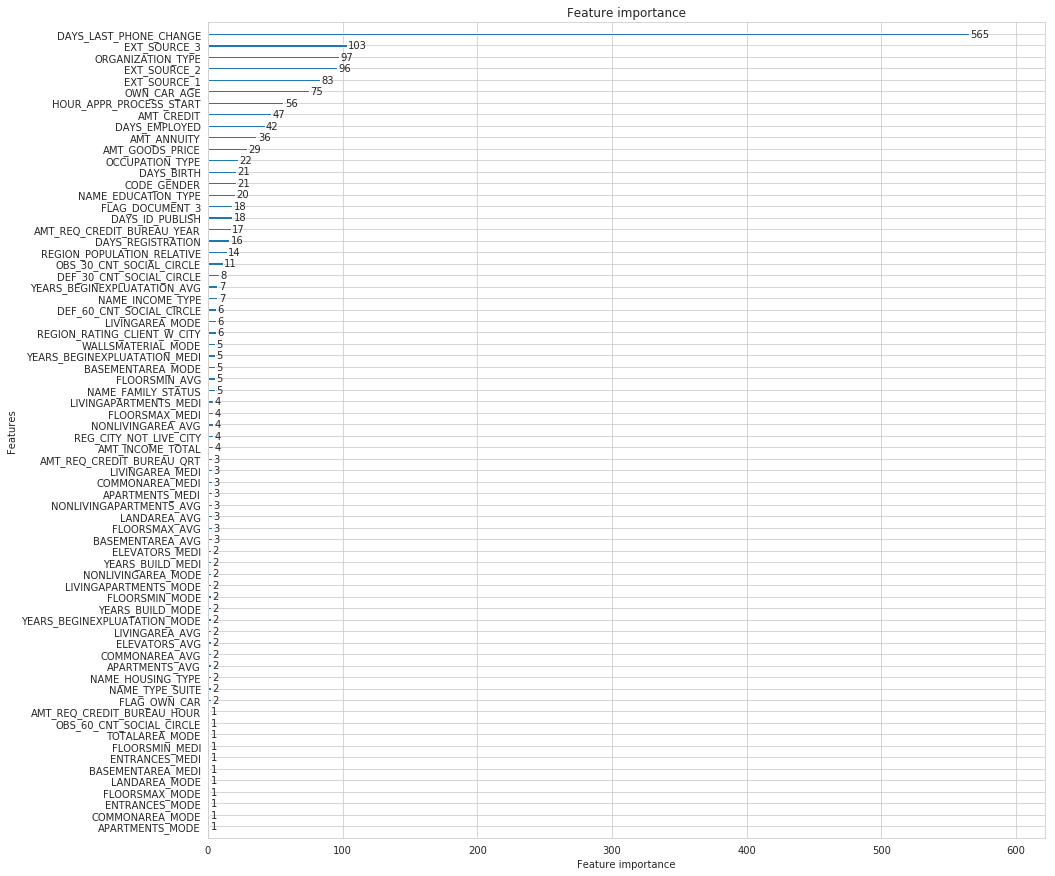

In [63]:
ax = lightgbm.plot_importance(model, max_num_features=70, figsize=(15,15))
plt.show()

### Hope you find this helpful, please give it a thumbs up, Thankyou